#    Name: Shubhal Patil
# **Task 1: Prediction using Supervised Learning**
### Aim: To predict next values from current data using Simple Linear Regression

### Importing Required Libraries

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [224]:
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df=pd.read_csv(url)
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Data Adequacy (Data Preprocessing) 

In [225]:
df.shape

(25, 2)

#### => *Means, Given Data is in 2D format*

### Nature of Data

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### => *This represents given data two types of datatype i.e. float and int*

### Null values detection 

In [227]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

#### => *That means, Data is Free from Null values*

### Basic Statistics about data

In [228]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Outliers Detection

<AxesSubplot:>

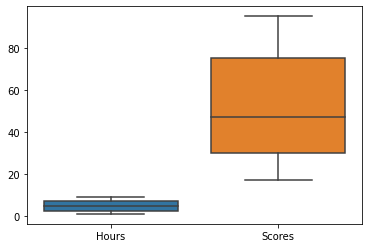

In [229]:
sns.boxplot(data=df)

#### => No any outlier found

## Plot the graph for understanding nature of data

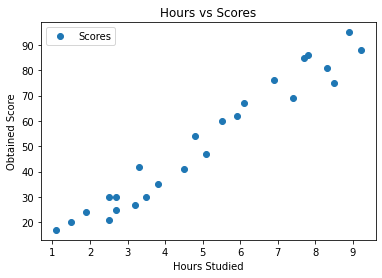

In [230]:
df.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Obtained Score')  
plt.show()

#### => This graph gives idea about nature of data which is possitively correlated

### Data Preparation for futher Calculation
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [231]:
X = df.iloc[:,:1].values  
y = df.iloc[:,1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

## Training the Model

In [232]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [233]:
from sklearn.linear_model import LinearRegression  
lm = LinearRegression()

In [234]:
lm.fit(X_train, y_train) 

LinearRegression()

## Plotting the regression line on graph

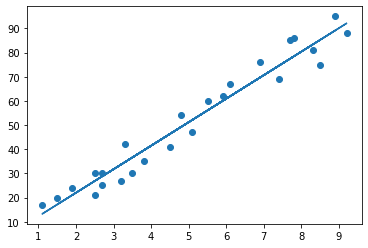

<Figure size 2880x2160 with 0 Axes>

In [243]:
line = lm.coef_*X+lm.intercept_ 
plt.scatter(X,y)
plt.plot(X, line);
plt.figure(figsize=(40,30))
plt.show()


## **Test for Predictions**


### Testing Data

In [236]:
y_pred = lm.predict(X_test) # Predicting the scores
y_pred

array([26.84539693, 77.45859361, 39.4986961 , 74.53860149, 56.04531809])

## Actual score v/s Predicted score

In [237]:
df1= pd.DataFrame({'Actual': y_test,'Predicted': y_pred})  
df1

,Actual,Predicted
0,30,26.845397
1,85,77.458594
2,35,39.498696
3,69,74.538601
4,60,56.045318


## Evaluating the Model
### Let's calculate some errors:

In [238]:
from sklearn import metrics

In [239]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred),'\n')
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred),'\n')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)),'\n')

Mean Absolute Error: 4.937597792467705 

Mean Squared Error: 26.675642597052235 

Root Mean Squared Error: 5.164846812544612 



# Conclusions

In [240]:
print(lm.coef_)

[9.73330705]


### The above no. indicate that 1 unit increase in study hourper day will lead to an increase in approximatly 9.73 marks in examination.

## Find predicted score if student studies for 9.25 hrs/day?

In [241]:
new_score=lm.predict([[9.25]])
print(new_score)

[92.54521954]


### There is certainity of gettting 92.55% score in examination if student studies for 9.25 hrs/day